# Team Members: 

- ### Hammam Abdelwahab 
- ### Najlae Lemrabet
- ### Hatim Jamali

### Please note that there will be a conclusion after each group of classification steps below. 

----
# Data Understanding: 
- The given data demonstrates various material's reflection responses for a range of wavelengths. 
- The features are considered to be the wavelengths that the materials (as samples) will get tested by. 

# Data Pre-processing:
###### The following steps are applied on the data: 
- Converted string elements to numeric. 
- Transposed the data set in order to have the wavelength as features. 
- Labels are added to samples. 
- All samples are combined. 
- The data-set is then normalized. 

# Feature Reduction Approach: 
- The features that show reflection information for all samples were considered. 
- PCA is applied. 
- TNSE is also applied for performance evaluation. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import feature_selection as fs
from sklearn import preprocessing
from scipy import signal
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#INSTALL memory_profiler PACKAGE 
%load_ext memory_profiler

### Please note that for memory footprint, install the package (memory_profiler) as shown in this link here: 
(https://ipython-books.github.io/44-profiling-the-memory-usage-of-your-code-with-memory_profiler/)

In [2]:
def to_numeric(data):
    """
    - convert the data from string to numeric.
    - checks for each column in the datafarame 
    if it is string, change the ',' into '.'
    and convert it to float. 
    """
    for i in range(len(data.iloc[:,0])):
        for j in range(1,len(data.iloc[0,:])):
            if type(data.iloc[i,j]) != str:
                pass
            else:
                data.iloc[i,j]=data.iloc[i,j].replace(',','.')
        data.iloc[i,:]=pd.to_numeric(data.iloc[i,:])
    return data
  

In [3]:
def normalization(df):
    """
    - normalizes the data between 0 and 1. 
    - ensures the final output has same column names. 
    """
    columns_names = df.columns
    x = df.values #returns a numpy array
    #x1 = df.iloc[:,0].values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    #return the wavelengths values
    #df.update(x1)
    #return the columns names that were changed after normalization
    df.columns = columns_names
    return df

In [4]:
def transpose(x):
    """
    returns transpose as data frame. 
    """
    x = pd.DataFrame(x.T)
  
    return x 

In [5]:
def add_label_row(my_data,label):
    '''
    - adds labels for each material. 
    - First make sure that the 'nm' are features
    '''
    #my_data = transpose(my_data)
    labels = [label]*my_data.shape[0]
    my_data['Labels'] = labels
    return my_data

In [6]:
def decrease_features(material_fake_1):
    """
    - decrease wavelengths 'nm' for between range 670 and 1600 
    - remove the features between the 10's. 
    
    """
    material_fake_1 = material_fake_1[(material_fake_1['nm'] >= 670) & (material_fake_1['nm'] <= 1600) 
                                                             & (material_fake_1['nm'] % 10 == 0)]
    return material_fake_1



In [7]:
def remove_nan(x):
    """
    - removes NaNs
    """
    x = x[np.isfinite(x[x.columns[:]])]
    return x

# 1 - Data preparation

In [8]:
def data_prepare(x,label): 
    
    """    
    - steps are shown in comments here.
    
    """
    #convert from str to numbers
    x = to_numeric(x)
    #normalization (except wavelengths)
    #x = normalization(x)
    #decrease features 
    x = decrease_features(x)
    #wavelength as features
    x = transpose(x)
    #puttig wavelength as column names 
    x.columns = x.iloc[0,:].astype(str)
    # consider nm as features and remove them from first row. 
    x = x.iloc[1:,:]
    # remove NaNs 
    #x = remove_nan(x)
    #add labels 
    x = add_label_row(x,label)
    
    return x 
    
    

# 2 - Upload and prepare

In [9]:
material_fake = pd.read_csv('2016material-fake.csv')
material_fake = data_prepare(material_fake,0)
material_fake.head()

material = pd.read_csv('2016material.csv')
material = data_prepare(material,0)
material.head()

skin = pd.read_csv('2016skin.csv' )
skin = data_prepare(skin,1)
skin.head()


fleisch = pd.read_csv('Fleisch.csv')
fleisch = data_prepare(fleisch,0)

holz = pd.read_csv('Holz.csv')
holz = data_prepare(holz,0)

leder = pd.read_csv('Leder.csv')
#label needs check
leder = data_prepare(leder,0)

r_haut_6_klassen = pd.read_csv('Referenz-Haut_6-Klassen.csv')
r_haut_6_klassen = data_prepare(r_haut_6_klassen,1)

stoff = pd.read_csv('Stoff.csv')
stoff = data_prepare(stoff,0)



# 3 - Combine All data into one data frame: 

In [10]:
data = pd.concat([material_fake,material, skin,fleisch,holz,leder,r_haut_6_klassen,stoff])
data.head(4)

nm,670.0,680.0,690.0,700.0,710.0,720.0,730.0,740.0,750.0,760.0,...,1520.0,1530.0,1540.0,1550.0,1560.0,1570.0,1580.0,1590.0,1600.0,Labels
"Fake 151, (M, id=3072)",9.8755,7.2233,7.29087,7.19956,7.08415,6.56918,6.65277,6.67426,6.09827,6.53631,...,5.0222,5.26137,4.68767,5.42535,5.22219,5.08914,5.16308,5.13991,4.86709,0
"Fake 151, (M, id=3073)",9.30512,5.95306,6.34278,5.68604,5.64201,5.00978,5.86931,5.38686,5.103,5.47922,...,4.60146,5.0027,4.36129,4.95328,4.4578,5.06535,4.50705,4.83864,5.01178,0
"Fake 152, (M, id=3074)",10.9101,8.20455,7.59416,7.90975,7.36568,7.65543,7.92347,7.7978,7.75812,7.71672,...,6.84876,7.01294,6.87307,7.00417,6.72423,7.56398,7.14179,7.41198,7.18305,0
"Fake 152, (M, id=3075)",7.21955,4.79015,5.08008,4.50631,4.83671,4.47281,4.72814,4.50872,4.44971,4.62413,...,4.122,3.98259,3.72853,3.94234,3.69046,4.23536,4.29474,3.6822,4.12567,0


# 4 - Normalization of Data

In [11]:
data = normalization(data)
data.head(4)

/home/najlae/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


nm,670.0,680.0,690.0,700.0,710.0,720.0,730.0,740.0,750.0,760.0,...,1520.0,1530.0,1540.0,1550.0,1560.0,1570.0,1580.0,1590.0,1600.0,Labels
0,0.009005,0.007090,0.006448,0.006342,0.006172,0.005713,0.005804,0.005916,0.005377,0.005798,...,0.005315,0.005151,0.005202,0.005793,0.005159,0.005217,0.005502,0.005157,0.004740,0.0
1,0.008441,0.005834,0.005508,0.004840,0.004739,0.004161,0.005023,0.004629,0.004381,0.004740,...,0.004894,0.004893,0.004876,0.005321,0.004395,0.005194,0.004846,0.004856,0.004885,0.0
2,0.010029,0.008060,0.006748,0.007047,0.006452,0.006794,0.007071,0.007038,0.007039,0.006979,...,0.007141,0.006903,0.007386,0.007371,0.006661,0.007692,0.007480,0.007429,0.007056,0.0
3,0.006376,0.004685,0.004257,0.003670,0.003938,0.003627,0.003885,0.003752,0.003727,0.003884,...,0.004415,0.003872,0.004243,0.004311,0.003627,0.004364,0.004634,0.003699,0.003998,0.0


# 5 - Visualization


- The bar chart shoes that the data is labeled around 50% class 1 (skins) and the rest is class 1. 
- Then we see the labeled data behavior prior to classification in order to give an intuitoin on how the data will be classified. 
- Another graph demonstrates the mean reflection of each class through the wavelengths. 

In [12]:
data.Labels.value_counts()

0.0    457
1.0    260
Name: Labels, dtype: int64

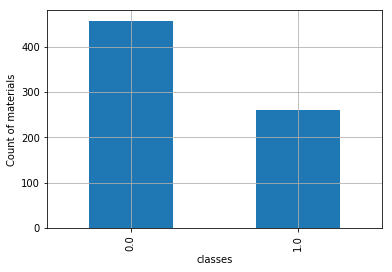

In [13]:
%matplotlib inline
data.Labels.value_counts().plot.bar()
plt.grid()
plt.xlabel("classes")
plt.ylabel("Count of materials")
plt.show()


### Visualizing classes using mean of each class: 

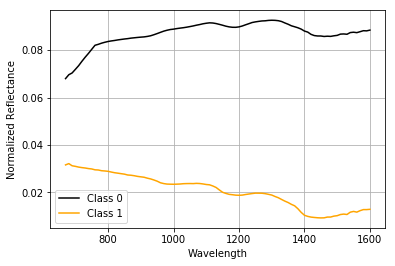

In [14]:
Y = []
for i in range(len(data.iloc[0])-1):
    Y.append(data.iloc[0][i])

X = []
for i in range(data.columns.shape[0]-1):
    X.append(float(data.columns[i]))


df_0 = data[data['Labels'] == 0]
df_1 = data[data['Labels'] == 1]

df_0 = df_0.drop('Labels',axis=1)

df_1 = df_1.drop('Labels',axis=1)

mean0 = df_0.mean()
mean1 = df_1.mean()



Y0 = []
for i in range(len(mean0)):
    Y0.append(mean0[i])

Y1 = []
for i in range(len(mean1)):
    Y1.append(mean1[i])

plt.plot(X, Y0,c='black',label="Class 0")
plt.plot(X, Y1,c='orange',label="Class 1")
plt.grid()
plt.xlabel("Wavelength")
plt.ylabel("Normalized Reflectance")
plt.legend()
plt.show()

### Visualizing materials: 

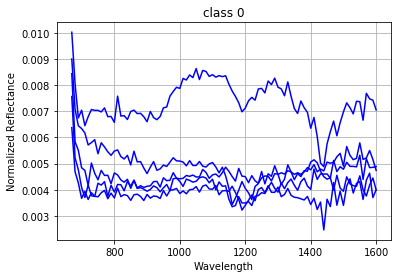

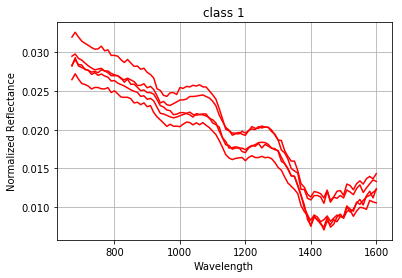

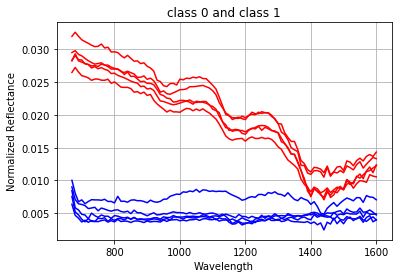

In [15]:
for i in range(5):
    Y0 = []
    for j in range(len(df_0.iloc[i])):
        Y0.append(df_0.iloc[i][j])
    plt.plot(X, Y0,c='blue')
plt.title("class 0")
plt.xlabel("Wavelength")
plt.ylabel("Normalized Reflectance")
plt.grid()
plt.show()

for i in range(5):
    Y0 = []
    for j in range(len(df_1.iloc[i])):
        Y0.append(df_1.iloc[i][j])
    plt.plot(X, Y0,c='red')
plt.title("class 1")
plt.xlabel("Wavelength")
plt.ylabel("Normalized Reflectance")
plt.grid()
plt.show()    

for i in range(5):
    Y0 = []
    for j in range(len(df_0.iloc[i])):
        Y0.append(df_0.iloc[i][j])
    plt.plot(X, Y0,c='blue')
for i in range(5):
    Y0 = []
    for j in range(len(df_1.iloc[i])):
        Y0.append(df_1.iloc[i][j])
    plt.plot(X, Y0,c='red')
plt.title("class 0 and class 1")
plt.xlabel("Wavelength")
plt.ylabel("Normalized Reflectance")
plt.grid()
plt.show()       

----

# 6 - Classification and Perfomrance Evaluation: 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

X = data.drop('Labels',axis=1)
y = data['Labels']

In [17]:
def confusion_matrix_plot(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Paired_r)
    classNames = ['Negative','Positive']
    plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


In [18]:
def mlp_classifier(x,y):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,\
                        hidden_layer_sizes=(5,6), random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=442)
    clf.fit(X_train, y_train) 
    y_pred=clf.predict(X_test)
    print("Accuracy=",accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test,y_pred)
#     print(classification_report(y_test,y_pred))
    confusion_matrix_plot(cm)

In [19]:
def svm_linear_classifier(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=442)
    svclassifier = SVC(kernel='linear')
    #svclassifier = SVC(kernel='poly', degree=1)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Accuracy=",accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test,y_pred)
#     print(classification_report(y_test,y_pred))
    confusion_matrix_plot(cm)

In [20]:
def rbf(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state=442)
    svclassifier = SVC(C=100000000,kernel='rbf',gamma='auto')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Accuracy=",accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test,y_pred)
#     print(classification_report(y_test,y_pred))
    confusion_matrix_plot(cm)

In [21]:
def logistic_reg(X,Y):    
    clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=442)
    clf.fit(X_train, y_train)  
    y_pred=clf.predict(X_test)
    print("Accuracy=",accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test,y_pred)
#     print(classification_report(y_test,y_pred))
    confusion_matrix_plot(cm)


In [22]:
def knn(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=442)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print("Accuracy=",accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test,y_pred)
#     print(classification_report(y_test,y_pred))
    confusion_matrix_plot(cm)


### MLP Classifier

0.06379559700144455
Accuracy= 0.9722222222222222


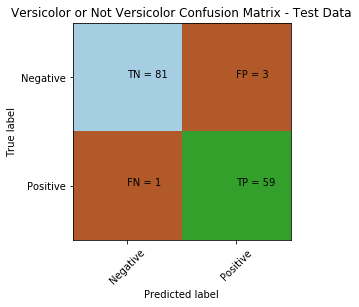

peak memory: 159.05 MiB, increment: 3.20 MiB


In [23]:
%%memit
import timeit
print(timeit.timeit('mlp_classifier', globals=globals()))
mlp_classifier(X,y)  

### SVM Classifier 
#### Kernal: Linear

0.05163884800276719
Accuracy= 0.8680555555555556


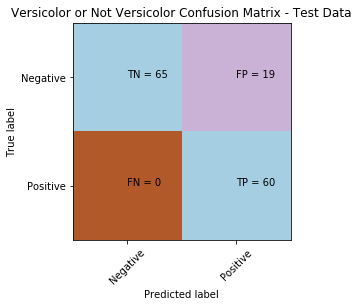

peak memory: 159.13 MiB, increment: 0.08 MiB


In [24]:
%%memit
import timeit
print(timeit.timeit('svm_linear_classifier', globals=globals()))
svm_linear_classifier(X,y)

### SVM Classifier
#### Kernel : Radial Basis Function

0.03575969200755935
Accuracy= 0.9861111111111112


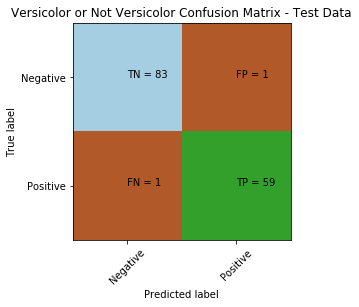

peak memory: 159.13 MiB, increment: 0.00 MiB


In [25]:
%%memit
import timeit
print(timeit.timeit('rbf', globals=globals()))
rbf(X,y)

### Logistic Regression

0.04331681200710591
Accuracy= 0.7777777777777778


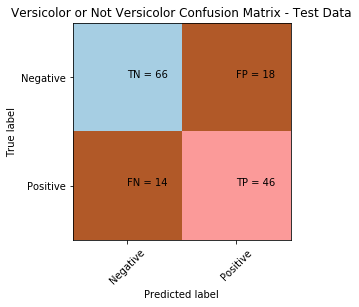

0.029409838010906242
Accuracy= 0.7777777777777778


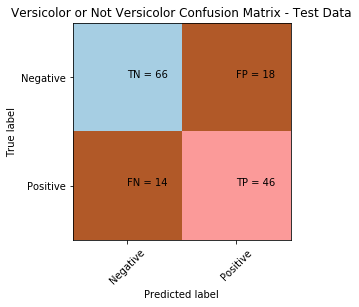

peak memory: 159.77 MiB, increment: 0.62 MiB


In [26]:
%%memit
import timeit
print(timeit.timeit('logistic_reg', globals=globals()))
logistic_reg(X,y)

### KNN Classifier

0.09816105201025493
Accuracy= 0.9861111111111112


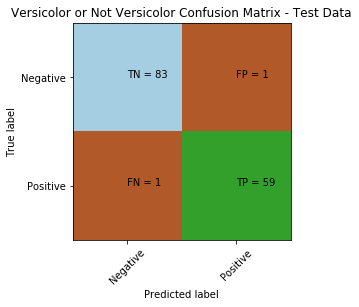

peak memory: 160.10 MiB, increment: 0.33 MiB


In [27]:
%%memit
import timeit
print(timeit.timeit('knn', globals=globals()))
knn(X,y)

# Conclusion 
- Classification here shows highest accuracy using KNN and RBF classifiers with accuracies (0.98).
- The rest of classifiers give accuracy between 0.77 and 0.97. 


------------------------------------------------------------------------
------------------------------------------------------------------------

# Dimensionality reduction 

## PCA

In [28]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [29]:
data.head()

nm,670.0,680.0,690.0,700.0,710.0,720.0,730.0,740.0,750.0,760.0,...,1520.0,1530.0,1540.0,1550.0,1560.0,1570.0,1580.0,1590.0,1600.0,Labels
0,0.009005,0.007090,0.006448,0.006342,0.006172,0.005713,0.005804,0.005916,0.005377,0.005798,...,0.005315,0.005151,0.005202,0.005793,0.005159,0.005217,0.005502,0.005157,0.004740,0.0
1,0.008441,0.005834,0.005508,0.004840,0.004739,0.004161,0.005023,0.004629,0.004381,0.004740,...,0.004894,0.004893,0.004876,0.005321,0.004395,0.005194,0.004846,0.004856,0.004885,0.0
2,0.010029,0.008060,0.006748,0.007047,0.006452,0.006794,0.007071,0.007038,0.007039,0.006979,...,0.007141,0.006903,0.007386,0.007371,0.006661,0.007692,0.007480,0.007429,0.007056,0.0
3,0.006376,0.004685,0.004257,0.003670,0.003938,0.003627,0.003885,0.003752,0.003727,0.003884,...,0.004415,0.003872,0.004243,0.004311,0.003627,0.004364,0.004634,0.003699,0.003998,0.0
4,0.007568,0.005219,0.004761,0.004086,0.003700,0.004181,0.003770,0.003741,0.004246,0.004178,...,0.004225,0.004156,0.004131,0.004530,0.003997,0.003761,0.004177,0.004449,0.003991,0.0


In [30]:
X_PCA = data.drop('Labels',axis=1).values
y_PCA = data['Labels'].values

#### looking for optimal number of components so that we can keep the most variance of our data

Explained variation per principal component: [9.86395733e-01 1.01265496e-02 2.18941014e-03 7.31132595e-04
 3.15158902e-04 8.11881203e-05 7.14016841e-05 3.12518695e-05
 1.56368564e-05 1.37097943e-05 7.32037110e-06 6.28156114e-06
 4.53440574e-06 2.02357140e-06 1.31565926e-06 1.03777123e-06
 8.89849042e-07 5.90429625e-07 5.03517443e-07 3.08187590e-07
 2.55623100e-07 2.09725397e-07 1.90488976e-07 1.81515744e-07
 1.64208556e-07 1.54525224e-07 1.48172972e-07 1.33895177e-07
 1.27432330e-07 1.06707108e-07 1.06433593e-07 9.79671848e-08
 9.56879330e-08 9.30247042e-08 8.54716341e-08 7.99375162e-08
 7.83851898e-08 7.67664535e-08 6.90851863e-08 6.59099155e-08
 6.41257556e-08 6.09135431e-08 6.01916348e-08 5.72570684e-08
 5.54603849e-08 5.40028425e-08 5.23234709e-08 5.07653292e-08
 4.76954278e-08 4.67761834e-08 4.39500421e-08 4.34004825e-08
 4.05674468e-08 3.95991190e-08 3.84413476e-08 3.77982718e-08
 3.47174951e-08 3.37214923e-08 3.27709252e-08 3.15063935e-08
 2.99868676e-08 2.88801488e-08 2.7165050

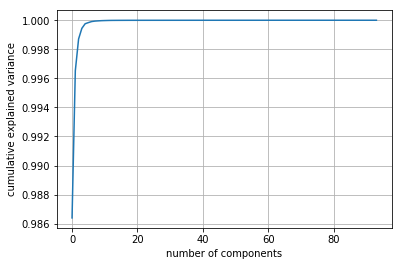

In [31]:
pca = PCA().fit(X_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.grid()

#### using 2 or 3 components : we got around 99.86 % of the total variance

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_PCA = pca.fit_transform(X_PCA)
principalDf_PCA = pd.DataFrame(data = principalComponents_PCA, columns = ['PC1', 'PC2'])

In [33]:
principalDf_PCA.head()

,PC1,PC2
0,-0.559835,0.037403
1,-0.565801,0.040369
2,-0.537157,0.040044
3,-0.570656,0.041341
4,-0.565271,0.042073


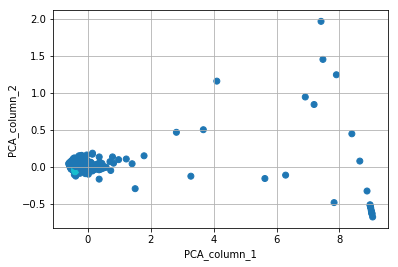

In [34]:
fig = plt.figure()
plt.scatter(principalDf_PCA['PC1'], principalDf_PCA['PC2'], c=y_PCA,cmap='tab10')
plt.xlabel("PCA_column_1")
plt.ylabel("PCA_column_2")
plt.grid()

## T-SNE

In [35]:
X=data.drop('Labels',axis=1)
Y=data['Labels']

In [36]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.002s...
[t-SNE] Computed neighbors for 717 samples in 0.083s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.013621
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.229729
[t-SNE] Error after 300 iterations: 0.394841
t-SNE done! Time elapsed: 4.348894357681274 seconds


In [37]:
principalDf_TSNE = pd.DataFrame(data = tsne_results, columns = ['tsne-2d-one', 'tsne-2d-two'])

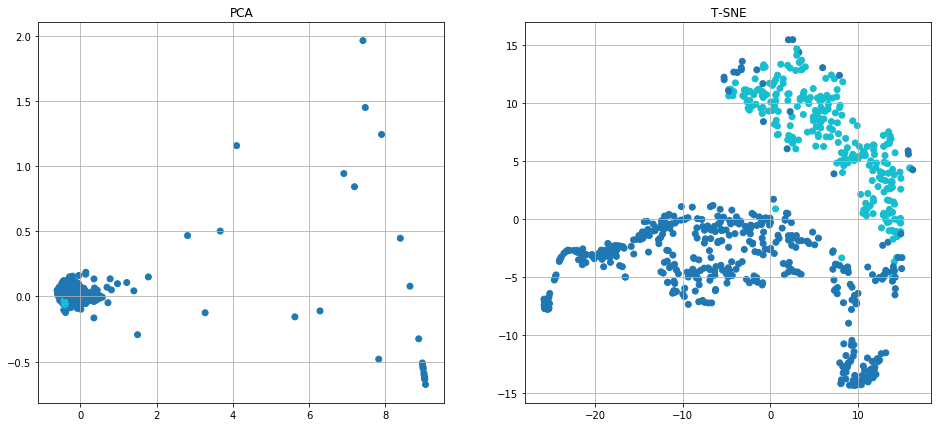

In [38]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
plt.scatter(
    x=principalDf_PCA['PC1'], 
    y=principalDf_PCA['PC2'], 
    c=y_PCA,
    cmap='tab10'
)
plt.title('PCA')
plt.grid()
ax2 = plt.subplot(1, 2, 2)
plt.scatter(
    x=principalDf_TSNE['tsne-2d-one'], 
    y=principalDf_TSNE['tsne-2d-two'], 
    c=Y,
    cmap='tab10'
)
plt.title('T-SNE')
plt.grid()

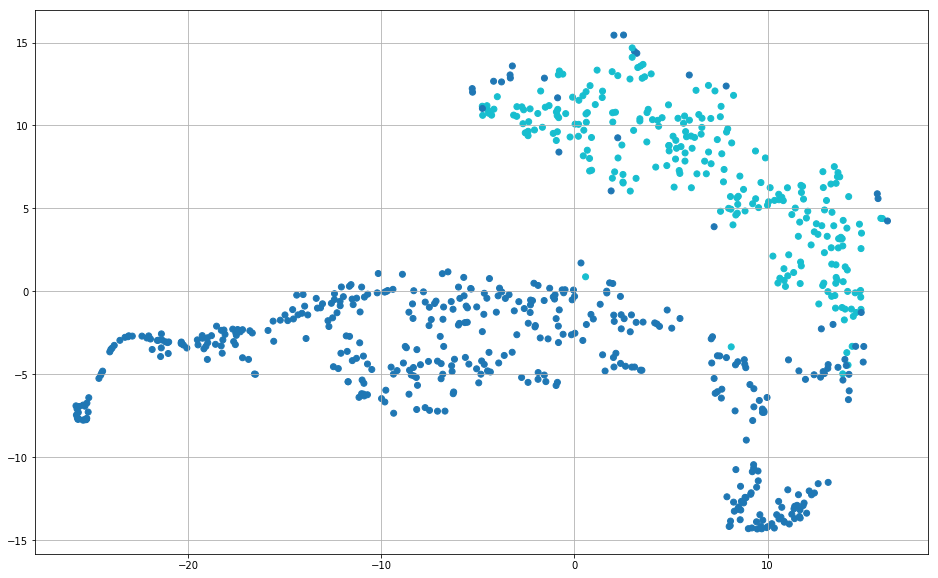

In [39]:
plt.figure(figsize=(16,10))
plt.scatter(
    x=principalDf_TSNE['tsne-2d-one'], 
    y=principalDf_TSNE['tsne-2d-two'], 
    c=Y,
    cmap='tab10'
)
plt.grid()

## Try Classification Algorithm after Using PCA

In [40]:
import timeit
X_pca = principalDf_PCA
y_pca = data['Labels']

#### 1 - Linear SVM

0.026232331001665443
Accuracy= 0.8611111111111112


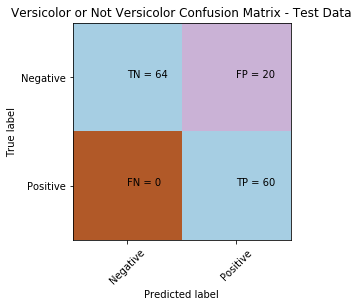

In [41]:
print(timeit.timeit('svm_linear_classifier', globals=globals()))
svm_linear_classifier(X_pca,y_pca)

#### 2 - SVM Kernel : Radial Basis Function

0.030726170996786095
Accuracy= 0.9930555555555556


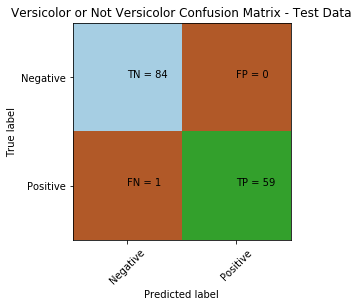

In [42]:
print(timeit.timeit('rbf', globals=globals()))
rbf(X_pca,y_pca)

#### 3 - MLP Classifier

0.026707359007559717
Accuracy= 0.9236111111111112


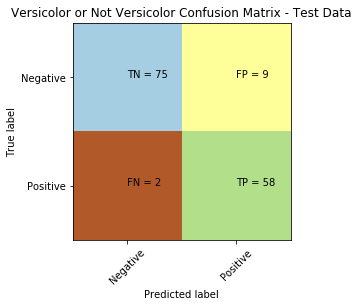

In [43]:
print(timeit.timeit('mlp_classifier', globals=globals()))
mlp_classifier(X_pca,y_pca)

#### 4 - logistic Regression

0.027122968007461168
Accuracy= 0.7708333333333334


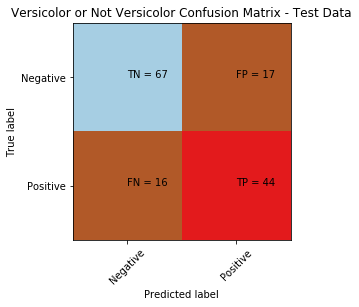

In [44]:
print(timeit.timeit('logistic_reg', globals=globals()))
logistic_reg(X_pca,y_pca)

#### 5 - knn

0.03734547000203747
Accuracy= 0.9722222222222222


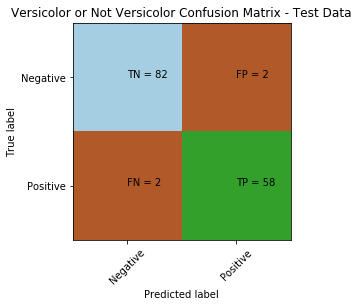

In [45]:
print(timeit.timeit('knn', globals=globals()))
knn(X_pca,y_pca)

# Conclusion  for PCA:
- Classification here shows highest accuracy using RBF and KNN classifiers with accuracies (0.97,0.99).
- The rest of classifiers give accuracy between 0.77 and 0.92. 


------------------------------------------------------------------------
------------------------------------------------------------------------

## Try Classification Algorithm after Using T-SNE

In [46]:
import timeit
X_tsne = principalDf_TSNE
y_tsne = data['Labels']

#### 1 - Linear SVM

0.02802336699096486
Accuracy= 0.9722222222222222


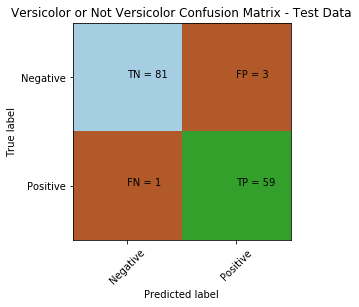

In [47]:
print(timeit.timeit('svm_linear_classifier', globals=globals()))
svm_linear_classifier(X_tsne,y_tsne)

#### 2 - SVM Kernel : Radial Basis Function

0.02739859100256581
Accuracy= 0.9652777777777778


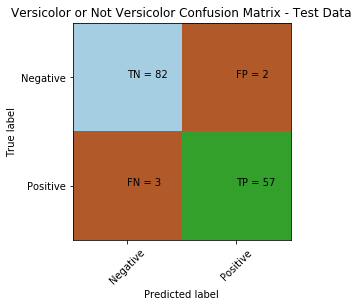

In [48]:
print(timeit.timeit('rbf', globals=globals()))
rbf(X_tsne,y_tsne)

#### 3 - MLP Classifier


0.023659398008021526
Accuracy= 0.9791666666666666


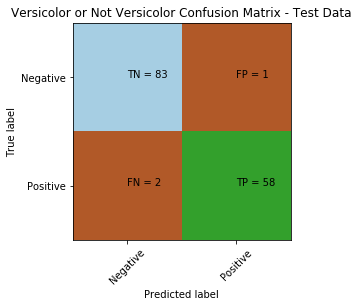

In [49]:
print(timeit.timeit('mlp_classifier', globals=globals()))
mlp_classifier(X_tsne,y_tsne)

#### 4 - logistic Regression

0.036092194000957534
Accuracy= 0.9722222222222222


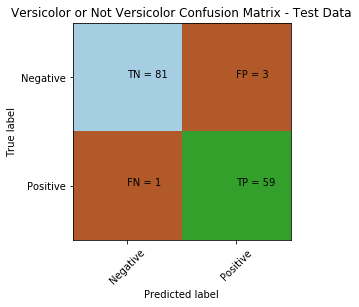

In [50]:
print(timeit.timeit('logistic_reg', globals=globals()))
logistic_reg(X_tsne,y_tsne)

#### 5 - knn

0.02368838399706874
Accuracy= 0.9791666666666666


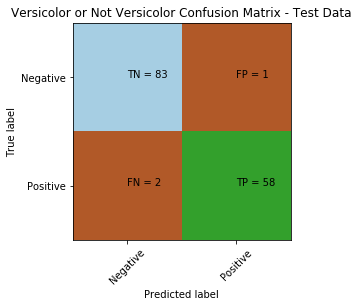

In [51]:
print(timeit.timeit('knn', globals=globals()))
knn(X_tsne,y_tsne)

# Conclusion  for TSNE:
- Classification here shows highest accuracy using MLP and KNN classifiers with accuracies (0.979).
- The rest of classifiers give accuracy between 0.96 and 0.972. 


------------------------------------------------------------------------
------------------------------------------------------------------------

## Dectect and Remove outliers Using Data after Dimensionality Reduction (T_SNE)

### Finding Outliers

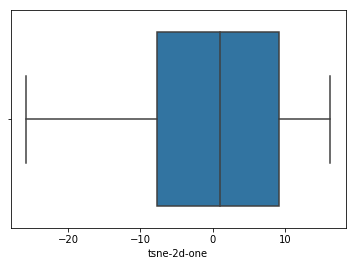

In [52]:
import seaborn as sns
sns.boxplot(x=principalDf_TSNE['tsne-2d-one'])


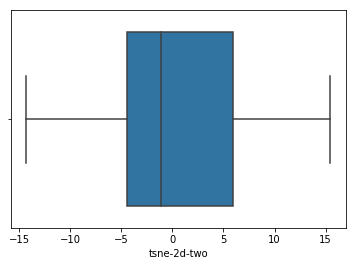

In [53]:
sns.boxplot(x=principalDf_TSNE['tsne-2d-two'])

#### we didn't find outliers after applying Dimensionality Reduction using T-NSE

##  Dectect and Remove outliers Using Data after Dimensionality Reduction (PCA)

### Finding Outliers

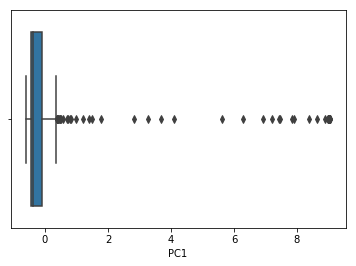

In [54]:
sns.boxplot(x=principalDf_PCA['PC1'])

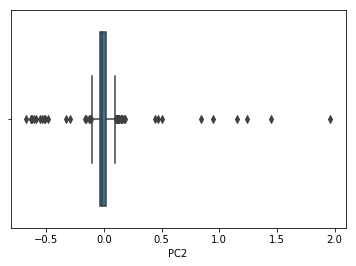

In [55]:
sns.boxplot(x=principalDf_PCA['PC2'])

#### in that case using the output of PCA Reduction algorithm ,we observe that we have outliers

#### Remove Outliers

In [56]:
from scipy import stats
z = np.abs(stats.zscore(X_pca))
# print(z)
threshold = 3
# print(np.where(z > 3))
X_pca_o = principalDf_PCA[(z < 3).all(axis=1)]
y = data['Labels']
y_pca_o = y[(z < 3).all(axis=1)]

#### 1 - Linear SVM 

0.032150034996448085
Accuracy= 0.8201438848920863


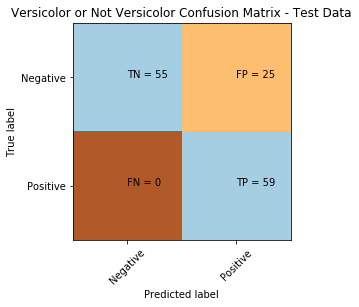

In [57]:
print(timeit.timeit('svm_linear_classifier', globals=globals()))
svm_linear_classifier(X_pca_o,y_pca_o)

#### 2 - SVM Kernel : Radial Basis Function

0.0412078100052895
Accuracy= 0.9712230215827338


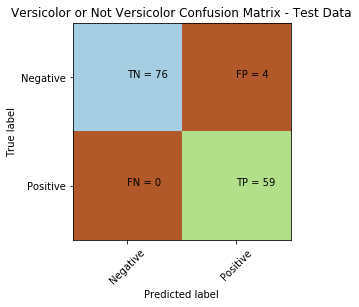

In [58]:
print(timeit.timeit('rbf', globals=globals()))
rbf(X_pca_o,y_pca_o)

#### 3 - MLP Classifier


0.02648767600476276
Accuracy= 0.9712230215827338


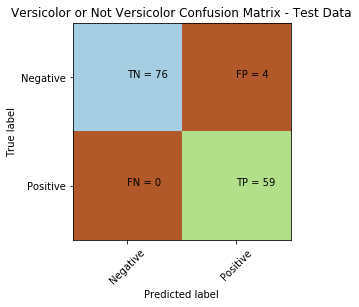

In [59]:
print(timeit.timeit('mlp_classifier', globals=globals()))
mlp_classifier(X_pca_o,y_pca_o)

#### 4 - logistic Regression

0.03668629098683596
Accuracy= 0.7410071942446043


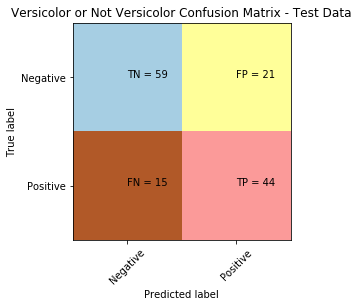

In [60]:
print(timeit.timeit('logistic_reg', globals=globals()))
logistic_reg(X_pca_o,y_pca_o)

#### 5 - knn

0.025884143004077487
Accuracy= 0.9496402877697842


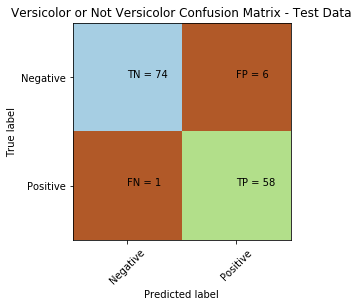

In [61]:
print(timeit.timeit('knn', globals=globals()))
knn(X_pca_o,y_pca_o)

# Conclusion  for PCA and outlier removal step:
- Classification here shows highest accuracy using RBF and MLP classifiers with accuracies (0.97).
- The rest of classifiers give accuracies between (0.74) and (0.94). 


------------------------------------------------------------------------
------------------------------------------------------------------------